## naive bayes

In [49]:
# naive bayes sklearn

# Applications: spam detection, character recognition

import pandas as pd

df = pd.read_csv('./dataset/titanic.csv')

df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
df.drop(['Name','PassengerId','Cabin','Embarked','Ticket'], axis = 1, inplace = True)

In [52]:
df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived'], dtype='object')

In [53]:
target = df.Survived
inputs = df.drop('Survived', axis = 1)

In [55]:
add_cols = pd.get_dummies(inputs['Sex'], dtype=int)
add_cols

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [62]:
inputs = pd.concat([inputs,add_cols], axis = 1)
inputs = inputs.drop('Sex', axis = 1)
inputs.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,female,male,female,male
0,3,22.0,1,0,7.2500,0,1,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,1,0
2,3,26.0,0,0,7.9250,1,0,1,0,1,0
3,1,35.0,1,0,53.1000,1,0,1,0,1,0
4,3,35.0,0,0,8.0500,0,1,0,1,0,1


In [71]:
inputs.columns[inputs.isna().any()]
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.Age.head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(inputs, target, test_size = 0.3)

In [75]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [76]:
model.fit(X_train, y_train)

GaussianNB()

In [77]:
model.score(X_test, y_test)
# uses r_squared metric to do this

0.8171641791044776

## Linear regression

In [78]:
# Linear regression


# Applications: Flight price prediction, Advanced House price prediction

# single variable

hoprice_df = pd.read_csv('./dataset/homeprices.csv')
hoprice_df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [79]:
from sklearn.linear_model import LinearRegression

Text(0, 0.5, 'Price')

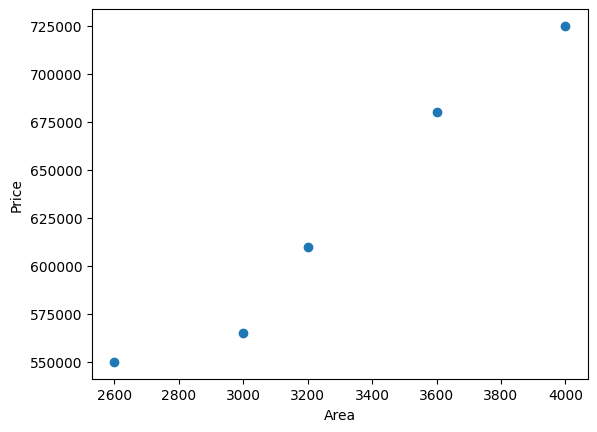

In [85]:
import matplotlib.pyplot as plt
plt.scatter(hoprice_df['area'],hoprice_df['price'])
plt.xlabel('Area')
plt.ylabel('Price')

In [97]:
model = LinearRegression()
model.fit(hoprice_df[['area']],hoprice_df[['price']])

LinearRegression()

In [98]:
hoprice_df.area

0    2600
1    3000
2    3200
3    3600
4    4000
Name: area, dtype: int64

In [101]:
model.predict([[3300]])

C:\Users\Nila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[628715.75342466]])

In [104]:
areas_df = pd.read_csv('./dataset/areas.csv')
areas_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [107]:
c_price = model.predict(areas_df[['area']])
c_price

array([[ 316404.10958904],
       [ 384297.94520548],
       [ 492928.08219178],
       [ 661304.79452055],
       [ 740061.64383562],
       [ 799808.21917808],
       [ 926090.75342466],
       [ 650441.78082192],
       [ 825607.87671233],
       [ 492928.08219178],
       [1402705.47945205],
       [1348390.4109589 ],
       [1144708.90410959]])

In [108]:
areas_df['price'] = c_price

In [109]:
areas_df

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [110]:
areas_df['price']=round(areas_df['price'],2)

In [111]:
areas_df

,area,price
0,1000,316404.11
1,1500,384297.95
2,2300,492928.08
3,3540,661304.79
4,4120,740061.64
5,4560,799808.22
6,5490,926090.75
7,3460,650441.78
8,4750,825607.88
9,2300,492928.08


Text(0, 0.5, 'Price')

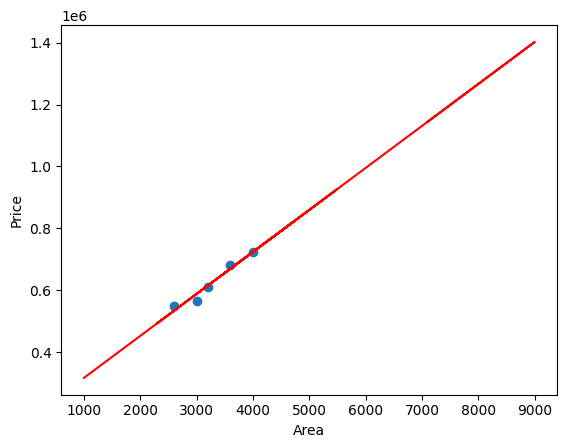

In [114]:
import matplotlib.pyplot as plt
plt.scatter(hoprice_df['area'],hoprice_df['price'])
plt.plot(areas_df['area'],areas_df['price'],color= 'red')
plt.xlabel('Area')
plt.ylabel('Price')

## Decision trees

In [118]:


import pandas as pd

dt = pd.read_csv('./dataset/salaries.csv')
dt.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [126]:
train_x_df = dt.drop('salary_more_then_100k', axis = 1)

In [127]:
train_y_df = dt['salary_more_then_100k']

In [128]:
train_x_df.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [123]:
from sklearn.preprocessing import LabelEncoder 

le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [129]:
train_x_df['company'] = le_company.fit_transform(train_x_df['company'])
train_x_df['job'] = le_job.fit_transform(train_x_df['job'])
train_x_df['degree'] = le_job.fit_transform(train_x_df['degree'])

In [130]:
train_x_df.head()

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [133]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(train_x_df, train_y_df)

DecisionTreeClassifier()

In [134]:
model.predict([[2,2,0]])

C:\Users\Nila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

## Support Vector machines

In [136]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [137]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [139]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [141]:
df['target'] = iris.target

In [142]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [146]:
df['target_names'] = df['target'].apply(lambda x: iris.target_names[x])

In [143]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [147]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [148]:
df_0 = df[df.target==0]
df_1 = df[df.target==1]
df_2 = df[df.target==2]

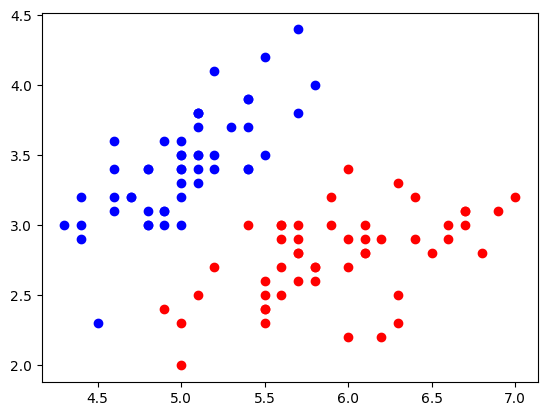

In [150]:
import matplotlib.pyplot as plt

plt.scatter(df_0['sepal length (cm)'],df_0['sepal width (cm)'],color='blue')
plt.scatter(df_1['sepal length (cm)'],df_1['sepal width (cm)'],color='red')

In [151]:
X = df.drop(['target','target_names'], axis = 1)

In [152]:
Y = df.target

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3)

model = SVC()

In [163]:
model.fit(X_train,y_train)

SVC()

In [164]:
model.score(X_test,y_test)

0.9333333333333333